# **Técnicas Avanzadas de Aprendizaje**

##Árboles de decisión - Recaudación de películas##

###Andrea Azábal Lamoso###

07 de junio de 2021

---

# Preparación del entorno

Importamos los paquetes necesarios:

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeRegressor

# IMDB dataset

La base de datos que vamos a utilizar en los cálculos está conformada por las siguientes variables: 

* Imdb_title_id: id único de cada película. 
* Original_title: título original de la película. 
* Year: año. 
* Genre: género. 
* Duration: duración en minutos. 
* Country: país. 
* Director: director. 
* Actors: actor principal. 
* Avg_votes: media de los votos de los usuarios. 
* Avg_vote_weighted: media ponderada de la media de los votos con su número. 
* Votes: número de votos de los usuarios. 
* Budget: presupuesto destinado a su producción. 
* Worldwide_gross_income: ingresos generados en todo el mundo. 
* Reviews_from_users: número de opiniones de usuarios. 
* Reviews_from_critics: número de opiniones de críticos. 




Importamos el fichero .csv:

In [3]:
from google.colab import files

uploaded = files.upload()

Almacenamos los datos contenidos en el csv en un *dataframe*:

In [4]:
path = "/content/act2_IMDb movies_ml.csv"
df_ini = pd.read_csv(path, sep=";")
print (df_ini.shape)
df_ini.head(3)

(8664, 15)


,imdb_title_id,original_title,year,genre,duration,country,director,actors,avg_vote,votes,avg_vote_weighted,budget,worlwide_gross_income,reviews_from_users,reviews_from_critics
0,tt0010323,Das Cabinet des Dr. Caligari,1920,"Fantasy, Horror, Mystery",76,Germany,Robert Wiene,Werner Krauss,8.1,55601,7.99,$ 18000,$ 8811,237,160
1,tt0012190,The Four Horsemen of the Apocalypse,1921,"Drama, Romance, War",150,USA,Rex Ingram,Pomeroy Cannon,7.2,3058,6.61,$ 800000,$ 9183673,45,16
2,tt0014624,A Woman of Paris: A Drama of Fate,1923,"Drama, Romance",82,USA,Charles Chaplin,Edna Purviance,7.0,4735,6.61,$ 351000,$ 11233,37,24


In [5]:
df_ini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8664 entries, 0 to 8663
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          8664 non-null   object 
 1   original_title         8664 non-null   object 
 2   year                   8664 non-null   int64  
 3   genre                  8664 non-null   object 
 4   duration               8664 non-null   int64  
 5   country                8664 non-null   object 
 6   director               8664 non-null   object 
 7   actors                 8664 non-null   object 
 8   avg_vote               8664 non-null   float64
 9   votes                  8664 non-null   int64  
 10  avg_vote_weighted      8664 non-null   float64
 11  budget                 8664 non-null   object 
 12  worlwide_gross_income  8664 non-null   object 
 13  reviews_from_users     8664 non-null   int64  
 14  reviews_from_critics   8664 non-null   int64  
dtypes: f

Podemos comprobar que hemos importado 15 variables: 5 de tipo entero, 2 de tipo *float* y el resto son categóricas.

# Preprocesado de información

Con el fin de aplicar los algoritmos de tipo "árbol de decisión", es necesario convertir todas las variables categóricas en numéricas. Para ello, nos valemos de la función `labelEncoder()`, la cual asigna un valor numérica a cada categoría, y creamos un nuevo *dataframe*:

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [7]:
df=df_ini.copy()
df["imdb_title_id"]=le.fit_transform(df_ini.imdb_title_id)
df["original_title"]=le.fit_transform(df_ini.original_title)
df['genre'] = le.fit_transform(df_ini.genre)
df["director"]=le.fit_transform(df_ini.director)
df["actors"]=le.fit_transform(df_ini.actors)
df["country"]=le.fit_transform(df_ini.country)

Comprobamos que todas las variables categóricas (expecto *budget* y *worldwide_gross_income*) son ahora de tipo entero:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8664 entries, 0 to 8663
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          8664 non-null   int64  
 1   original_title         8664 non-null   int64  
 2   year                   8664 non-null   int64  
 3   genre                  8664 non-null   int64  
 4   duration               8664 non-null   int64  
 5   country                8664 non-null   int64  
 6   director               8664 non-null   int64  
 7   actors                 8664 non-null   int64  
 8   avg_vote               8664 non-null   float64
 9   votes                  8664 non-null   int64  
 10  avg_vote_weighted      8664 non-null   float64
 11  budget                 8664 non-null   object 
 12  worlwide_gross_income  8664 non-null   object 
 13  reviews_from_users     8664 non-null   int64  
 14  reviews_from_critics   8664 non-null   int64  
dtypes: f

Asimismo, creamos un diccionario para almacenar la correspondencia entre la variable categórica y su equivalente numérico:

In [9]:
diccionario=pd.DataFrame({
    "original_genre": df_ini.genre,
    "codified_genre": df.genre,
    "original_director": df_ini.director,
    "codified_director": df.director,
    "original_actors": df_ini.actors,
    "codified_actors": df.actors,
    "original_country": df_ini.country,
    "codified_country": df.country,
})


In [10]:
diccionario.head(3)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
0,"Fantasy, Horror, Mystery",407,Robert Wiene,3282,Werner Krauss,3869,Germany,281
1,"Drama, Romance, War",377,Rex Ingram,3145,Pomeroy Cannon,3040,USA,807
2,"Drama, Romance",372,Charles Chaplin,561,Edna Purviance,1058,USA,807


Por otra parte, vamos a modificar las dos variables categóricas restantes. Estas variables están almacenando datos numéricos junto con la moneda ($). Por tanto, en primer lugar vamos a deshacernos de todos los caracteres no numéricos almacenados en las columnas y a continuación las convertimos a tipo numérico:

In [11]:
df['worlwide_gross_income']=pd.to_numeric(df_ini.worlwide_gross_income.replace("[^0-9]", "", regex=True))
df['budget']=pd.to_numeric(df_ini.budget.replace("[^0-9]", "", regex=True))

Así, el nuevo *dataframe* ya está listo para ser utilizado:

In [12]:
df.dtypes

imdb_title_id              int64
original_title             int64
year                       int64
genre                      int64
duration                   int64
country                    int64
director                   int64
actors                     int64
avg_vote                 float64
votes                      int64
avg_vote_weighted        float64
budget                     int64
worlwide_gross_income      int64
reviews_from_users         int64
reviews_from_critics       int64
dtype: object

#Árboles de decisión

Un árbol de decisión es un modelo de predicción en el cual cada nodo interno representa una decisión sobre una variable explicativa del conjunto de datos y cada rama representa el resultado de tomar una determinada decisión. Los nodos hoja son aquellos en los que ya no es posible tomar más decisiones sino que se alcanza una predicción.

El funcionamiento del algoritmo de decisión se basa en el cálculo de la mejor combinación "Variable – Condición" posible en cada nivel. Para ello, se minimiza la función de coste:

$$ \bbox[5px,border: 1px solid blue]{J(v_{i},c_{j}) = \frac{m_{izq}}{m}*I_{izq}+\frac{m_{der}}{m}*I_{der}} $$

 
Donde:

- $I_{izq/der}$ es la “impureza” de las posibles hojas resultantes de una decisión, que puede calcularse mediante la fórmula de Gini o la fórmula de la Entropía.

- $m_{izq/der}$ es el número de muestras resultantes en las posibles hojas.

- $m$ es el número total de muestras de entrenamiento.

Su representación gráfica viene dada por un grafo en el que se indican las variables que se utilizan para tomar decisiones y los valores límite a partir de los cuales el algoritmo estima que va a predecir mejor la variable dependiente.

A lo largo de esta tarea se van a realizar dos modelos de predicción de este tipo.

# Modelo 1: Recaudación de una película



El primero de los dos modelos va a consistir en estimar la recaudación de una película (*worlwide_gross_income*) dadas las variables: *genre*, *duration*, *country*, *director*, *actors* y *budget*.

##Modelizado

En primer lugar, definimos las variables dependiente ($y$) e independientes ($X_i$):

In [13]:
X1 = df[['genre', 'duration', 'country', 'director', 'actors','budget']]
y1 = df[['worlwide_gross_income']]

A continuación, dividimos ambas en subconjuntos de entrenamiento y *testing*. La finalidad es entrenar el algoritmo sobre el subconjunto de entrenamiento y después valorar la bondad de sus predicciones mediante el subconjunto de prueba. La división que realizamos es 70% entrenamiento y 30% prueba:

In [14]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1.values, y1.values, 
                                                    random_state=42, test_size=0.3)
print (X1_train.shape, y1_train.shape)
print (X1_test.shape, y1_test.shape)

(6064, 6) (6064, 1)
(2600, 6) (2600, 1)


Una vez tenemos los subconjuntos preparados, vamos a proceder al modelizado. Para ello, a priori no sabemos cuántos niveles serán necesarios en nuestro árbol de decisión. El hecho de seleccionar un número inadecuado para los parámetros del ajuste puede llevarnos a un modelo fuertemente afectado por el *overfitting* o el *underfitting*, que no arroje buenas predicciones.

El *underfitting* consiste en una modelización excesivamente simple, omitiendo variables significativas o limitando demasiado el árbol de decisión, que nos lleva a unos resultados que no representan adecuadamente la variabilidad de los datos.

El *overfitting* consiste en un ajuste excesivo al *dataset* de entrenamiento, de manera que el modelo se ajusta bien pero sus predicciones sobre otros conjuntos de datos son pobres.

Una correcta parametrización del modelo consiste en alcanzar un equilibrio entre ambas casuísticas. Los parámetros con los que podemos jugar en la función `DecisionTreeRegressor()` para alcanzar una correcta especificación del modelo son:

* **max_depth**: número máximo de niveles del árbol. 
* **min_samples_split**: es el número mínimo de muestras que un nodo debe tener para poder ser dividido.
* **min_samples_leaf**: número mínimo de muestras que puede haber en un nodo hoja.
* **min_weight_fraction_leaf**: se trata de la proporción de muestras, respecto al número total, que puede haber en un nodo hoja.
* **max_leaf_nodes**: es el número máximo de nodos hoja que puede tener el árbol.
* **max_features**: es el número máximo de variables predictoras que va a usar el AD. 

Esta función utiliza por defecto el criterio *mse* (minimizar los errores cuadráticos medios) para medir la idoneidad de cada decisión tomada.

Así, en primer lugar, vamos a ir variando el parámetro **max_depth** desde 1 hasta 9 y almacenando los resultados en un *dataframe* para después realizar una comparativa:

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []


for maxdepth in list(range(1,10)): #pruebo valores 1-9
  tree_model1 = DecisionTreeRegressor(random_state=0, max_depth=maxdepth)
  tree_model1.fit(X1_train, y1_train)

  pred_train1 = tree_model1.predict(X1_train)
  pred_test1 = tree_model1.predict(X1_test)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model1.score(X1_train, y1_train))
  score_test_list.append(100.0*tree_model1.score(X1_test, y1_test))
  mse_train_list.append(mean_squared_error(y1_train, pred_train1))
  mse_test_list.append(mean_squared_error(y1_test, pred_test1))

mod1 = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list
                   })

In [17]:
mod1.set_index("max_depth", inplace=True)

Los resultados almacenados son el *score* de cada ajuste, tanto sobre el subconjunto de training como para la predicción sobre el de *testing* (*score*), y la suma de errores cuadrados *mse*:

In [18]:
mod1

,score_train,score_test,mse_train,mse_test
max_depth,,,,
1,39.814424,36.418519,1.616028e+16,1.189476e+16
2,53.947556,47.135198,1.236543e+16,9.889897e+15
3,60.524868,52.678402,1.059937e+16,8.852879e+15
4,64.070767,53.057960,9.647269e+15,8.781872e+15
5,67.752062,53.364385,8.658813e+15,8.724546e+15
6,71.243513,50.415582,7.721332e+15,9.276206e+15
7,75.098020,39.447423,6.686368e+15,1.132812e+16
8,79.637467,34.861905,5.467493e+15,1.218597e+16
9,83.859218,20.997872,4.333921e+15,1.477964e+16


##Análisis

Para realizar la comparativa más visualmente, procedemos a representar gráficamente los valores obtenidos.

En primer lugar, representamos la suma de errores cuadráticos medios frente al número de niveles del árbol de decisión:

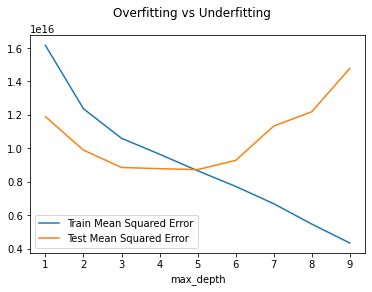

In [19]:
mod1["mse_train"].plot(label="Train Mean Squared Error")
mod1["mse_test"].plot(label="Test Mean Squared Error")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

Como es lógico, la curva es monótona decreciente para el subconjunto de entrenamiento. Esto tiene sentido puesto que, a mayor número de niveles, más capacidad tiene el algoritmo de ajustarse al *dataset* y por tanto es menor el error que comete. Sin embargo, si nos fijamos en el subconjunto de *testing* (línea amarilla), vemos que llega un punto en el que el hecho de añadir niveles es contraproducente y el error cuadrático medio empieza a aumentar para las predicciones. Es decir, **estamos observando *overfitting* para un número de niveles superior a 5**. Lo contrario ocurre para un número de niveles bajo ($<3$), donde vemos que hay *underfitting* puesto que tanto el error en el $X_{test}$ como en el $X_{train}$ son altos. Es decir, el modelo no está consiguiendo explicar la variable dependiente.

De acuerdo a esta gráfica, si hubiera que elegir un número óptimo de niveles, estaríamos en el rango 3-5.

Procedemos a pintar la misma representación pero, en esta ocasión, para el *score* del ajuste:

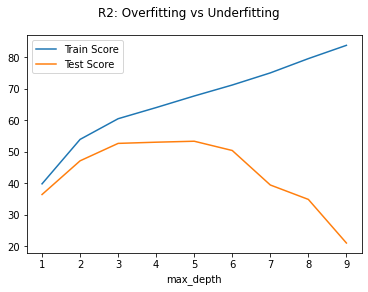

In [20]:
mod1["score_train"].plot(label="Train Score")
mod1["score_test"].plot(label="Test Score")
plt.suptitle("R2: Overfitting vs Underfitting")
plt.legend()
plt.show();

Observamos una situación análoga a la descrita para los errores cuadráticos medios. Aquí, el coeficiente de determinación aumenta monótonamente para el subconjunto de entrenamiento, indicando que la bondad del ajuste es cada vez mejor. Para el subconjunto de prueba, sin embargo, se alcanza un máximo en torno a 3-5 niveles y luego vuelve a descender. Es decir, como ya habíamos argumentado, para un número alto de niveles existe *overfitting* y para un número bajo de niveles *underfitting*.

##Elección del modelo

Como todavía no tenemos claro cuál es el número exacto de niveles sino que tenemos un rango entre 3 y 5, vamos a elegir el valor numérico máximo del $R^2$ de entre todas las parametrizaciones (sobre el subconjunto de prueba):

In [21]:
from sklearn.tree import plot_tree

In [22]:
pd.DataFrame(mod1.loc[mod1['score_test'].idxmax(),:])

,5
score_train,6.775206e+01
score_test,5.336438e+01
mse_train,8.658813e+15
mse_test,8.724546e+15


Por tanto nos quedamos con **5 niveles** en el árbol de decisión.

In [23]:
tree_model1 = DecisionTreeRegressor(random_state=0, max_depth=5)
tree_model1.fit(X1_train, y1_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

Podemos ver cuáles son las variables más relevantes a la hora de determinar la predicción del AD. Así:

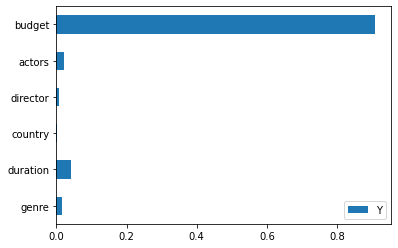

In [24]:
df_imp = pd.DataFrame(tree_model1.feature_importances_.reshape(1,-1), columns=X1.columns, index=["Y"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

Se tiene que el presupuesto de cada película es, con mucha diferencia, la variable más importante a la hora de estimar la recaudación. Esto tiene sentido puesto que, si pintamos las correlaciones entre variables:

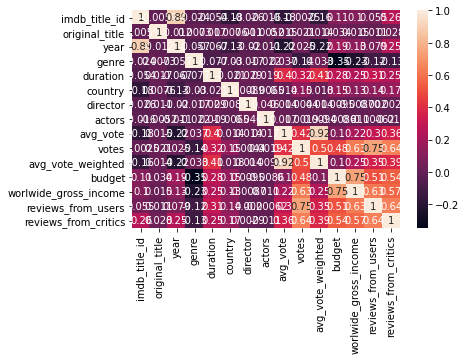

In [25]:
import seaborn as sn
sn.heatmap(df.corr(), annot=True)

Vemos que *worldwide_gross_income* está muy correlado con *budget* (0,75), por lo que tiene sentido que sea la variable más importante del modelo.

Si representamos el grafo:

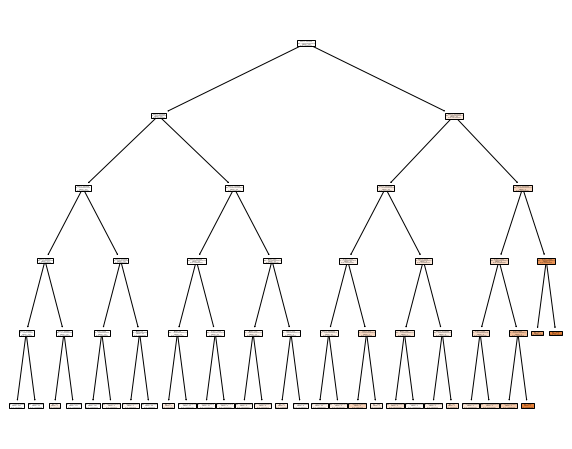

In [26]:
plt.figure(figsize=(10,8))
plot_tree(tree_model1, filled=True, max_depth=5, feature_names=X1.columns, class_names=["Y"])
plt.show()

Si lo hacemos más grande:

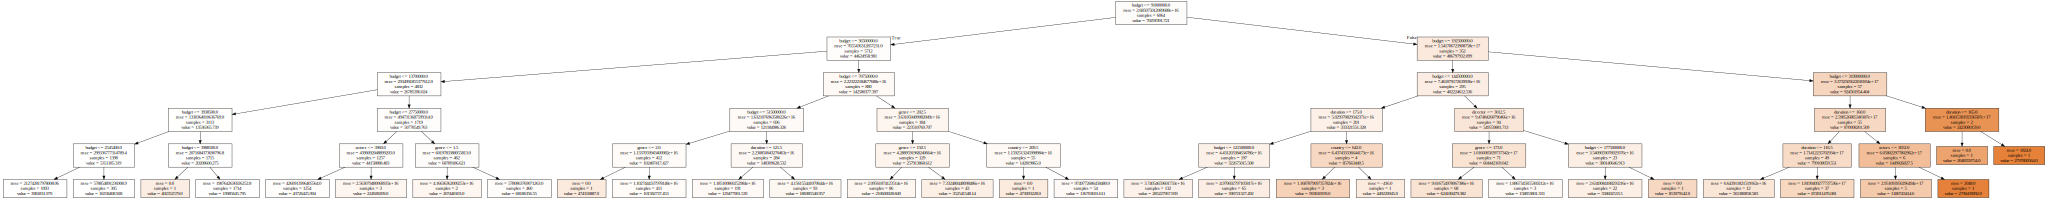

In [27]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_model1, filled=True, max_depth=5, feature_names=X1.columns, class_names=["Y"])
graphviz.Source(dot_data, format="png")

Se ve, por ejemplo, que en el primer nodo el AD está filtrando por presupuesto. Para $\text{budget}>91.000.000 \$$ se está yendo por la derecha y al revés. Los nodos más coloreados indican un menor error en el cálculo, pero a cambio vemos que solo se aplican a un número de películas extremadamente reducido.

Podemos realizar un *scatter plot* viendo una división entre las dos variables más relevantes *budget* y *duration*:

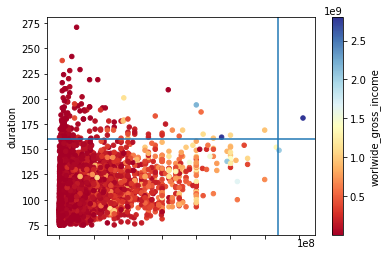

In [28]:
df.plot.scatter(x="budget", y="duration", c="worlwide_gross_income", cmap=plt.cm.RdYlBu)
plt.axvline(319000000)
plt.axhline(160)

Vemos que ha conseguido aislar los *outliers* o puntos más azules, es decir, las películas de mayor recaudación.

##Conclusiones

Hemos comprobado que la recaudación de una película depende principalmente de su presupuesto. Es un hecho lógico, ya que a mayor presupuesto disponible, más ambiciosa será la campaña publicitaria para anunciar la película y por tanto será más popular, aumentando su recaudación.

A la hora de elegir un modelo de predicción adecuado, como hemos argumentado, si seguimos el criterio "número máximo de niveles" para maximizar la bondad del ajuste, llegamos a la conclusión de que un número inferior a 3 provoca *underfitting* y uno superior a 5 *overfitting*, por lo que seleccionamos **5 niveles** como número óptimo.

De esta forma, al representar el grafo llegamos a varios nodos hoja que incluyen únicamente una observación, lo cual no parece muy eficiente. Podemos probar a seleccionar otro criterio para ver si conseguimos mejorar la predicción. Si en lugar del número máximo de niveles, fijamos el número mínimo de observaciones en un nodo hoja:

In [29]:
md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []


for min_samples_leaf in list(range(1,51,1)): #pruebo valores 1-50
  tree_model1v2 = DecisionTreeRegressor(random_state=0, min_samples_leaf=min_samples_leaf)
  tree_model1v2.fit(X1_train, y1_train)

  pred_train1v2 = tree_model1v2.predict(X1_train)
  pred_test1v2 = tree_model1v2.predict(X1_test)

  ## Generación de listas
  md_list.append(min_samples_leaf)
  score_train_list.append(100.0*tree_model1v2.score(X1_train, y1_train))
  score_test_list.append(100.0*tree_model1v2.score(X1_test, y1_test))
  mse_train_list.append(mean_squared_error(y1_train, pred_train1v2))
  mse_test_list.append(mean_squared_error(y1_test, pred_test1v2))

mod1v2 = pd.DataFrame({"min_samples_leaf":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list
                   })

In [30]:
mod1v2.set_index("min_samples_leaf", inplace=True)

- Errores cuadráticos medios

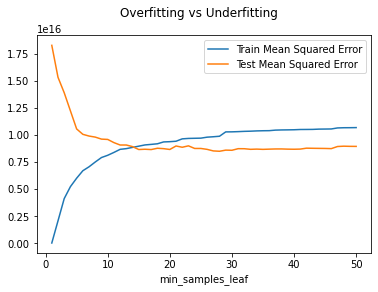

In [31]:
mod1v2["mse_train"].plot(label="Train Mean Squared Error")
mod1v2["mse_test"].plot(label="Test Mean Squared Error")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

- Coeficiente de determinación:

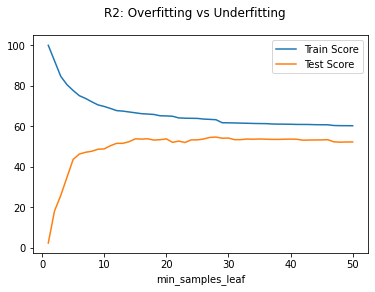

In [32]:
mod1v2["score_train"].plot(label="Train Score")
mod1v2["score_test"].plot(label="Test Score")
plt.suptitle("R2: Overfitting vs Underfitting")
plt.legend()
plt.show();

Observamos que el $R^2$ disminuye cuantas más observaciones hay en el nodo hoja para el subconjunto de entrenamiento. Si dejamos que haya muy pocas observaciones, entonces hay *overfitting* y el modelo se está sobreajustando al $X_{train}$, pero funciona muy mal para el $X_{test}$. A medida que dejamos que incorpore más puntos en el nodo final, se llega a un *plateau*, a partir de aproximadamente 10 observaciones. Si comparamos los resultados con los obtenidos previamente:

In [33]:
#Modelizado con máximo número de nodos = 5
pd.DataFrame(mod1.loc[mod1['score_test'].idxmax(),:])

,5
score_train,6.775206e+01
score_test,5.336438e+01
mse_train,8.658813e+15
mse_test,8.724546e+15


In [34]:
#Modelizado con mínimo de observaciones en nodo hoja = 12
pd.DataFrame(mod1v2.loc[12,:])

,12
score_train,6.774859e+01
score_test,5.157174e+01
mse_train,8.659745e+15
mse_test,9.059913e+15


Comparando ambos criterios, los resultados para *train* son similares pero los resultados para *test* son mejores con la primera especificación, por lo que nos quedamos con el modelo original.

##Predicción

Ahora vamos a realizar una predicción sobre dos películas de nuestra elección para ver cómo funciona el modelo. 

A la hora de seleccionar los valores de las variables explicativas, debemos tener cuidado de que estos estén dentro del rango sobre el que se ha entrenado el modelo. Si, por ejemplo, seleccionamos duraciones superiores a la de la película más larga del *dataset*, el modelo no será capaz de predecir correctamente.

###Interstellar

La primera película cuya recaudación vamos a estimar es Interstellar de Christopher Nolan. Si nos vamos al diccionario que creamos al comienzo de la actividad, podemos recuperar los valores codificados para cada una de las variables explicativas:

- Género: Adventure, Drama, Sci-FI

In [35]:
diccionario[diccionario['original_genre'].str.contains("Adventure, Drama, Sci-Fi")].head(1)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
3048,"Adventure, Drama, Sci-Fi",117,Alfonso Cuarón,146,Juan Gabriel Yacuzzi,1969,"USA, UK, Japan",1101


- País: USA, UK, Canada

In [36]:
diccionario[diccionario['original_country'].str.contains("USA, UK, Canada")].head(3)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
407,"Action, Adventure, Drama",5,Richard Donner,3162,Marlon Brando,2505,"USA, UK, Canada, Switzerland",1075
500,"Action, Adventure, Sci-Fi",12,Richard Lester,3178,Gene Hackman,1284,"USA, UK, Canada",1072
928,"Drama, Horror, Sci-Fi",356,David Cronenberg,838,Jeff Goldblum,1696,"USA, UK, Canada",1072


- Director: Christopher Nolan

In [37]:
diccionario[diccionario['original_director'].str.contains("Christopher Nolan")].head(1)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
3056,"Mystery, Thriller",445,Christopher Nolan,657,Guy Pearce,1368,USA,807


- Actriz: Ellen Burstyn

In [38]:
diccionario[diccionario['original_actors'].str.contains("Ellen Burstyn")].head(1)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
288,Horror,424,William Friedkin,3963,Ellen Burstyn,1106,USA,807


- Duración: 169 minutos
- Presupuesto: 165000000$

Una vez conocemos todos los valores, basta con aplicar el modelo:

In [39]:
#X_pred=[['genre', 'duration', 'country', 'director', 'actors','budget']]
X_pred=[[117,169,1072,657,1106,165000000]]
tree_model1.predict(X_pred)[0]

624100479.382353

Se ha obtenido una recaudación estimada de 624,1M de dólares, mientras que el valor real es 696,7M$. La discrepancia no es exagerada, por lo que damos por buena la estimación del modelo.

###Matrix

La segunda película que vamos a estimar es *The Matrix*. Si recuperamos las variables numéricas:

- Género: Action, Sci-Fi

In [40]:
diccionario[diccionario['original_genre'].str.contains("Action, Sci-Fi")].head(1)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
255,"Action, Sci-Fi",79,Don Taylor,995,Roddy McDowall,3235,USA,807


- País: USA

In [41]:
diccionario[diccionario['original_country'].str.contains("USA")].head(1)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
1,"Drama, Romance, War",377,Rex Ingram,3145,Pomeroy Cannon,3040,USA,807


- Director: Lana Wachowski

In [42]:
diccionario[diccionario['original_director'].str.contains("Lana Wachowski")].head(1)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
2139,"Crime, Romance, Thriller",305,Lana Wachowski,2254,Jennifer Tilly,1725,USA,807


- Actor: Keanu Reeves

In [43]:
diccionario[diccionario['original_actors'].str.contains("Keanu Reeves")].head(1)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
1232,"Adventure, Comedy, Music",98,Stephen Herek,3557,Keanu Reeves,2087,USA,807


- Duración: 136 minutos
- Presupuesto: 63000000$

Una vez conocemos todos los valores, basta con aplicar el modelo:

In [44]:
#X_pred=[['genre', 'duration', 'country', 'director', 'actors','budget']]
X_pred=[[79,136,807,2254,2087,63000000]]
tree_model1.predict(X_pred)[0]

186985540.95698926

En este segunda caso la estimación es de 187M de dólares mientras que la recaudación real fue de 465M$, por lo que la estimación, aunque del mismo orden de magnitud, no ha funcionado correctamente para esta película.

# Modelo 2: Rating

Ahora vamos a aplicar el algoritmo para la estimación de la media ponderada de los votos en IMDB (*avg_vote_weighted*) atendiendo a las variables: genre, duration, country, director, actors, budget, worldwide_gross_income, reviews_from_users y reviews_from_critics.


##Modelizado

Procedemos a definir las nuevas variables dependiente y explicativas:

In [45]:
X2 = df[['genre', 'duration', 'country', 'director', 'actors', 'budget', 'worlwide_gross_income', 'reviews_from_users','reviews_from_critics']]
y2 = df[['avg_vote_weighted']]

Dividimos el *dataset* en 70% entrenamiento y 30% prueba:

In [46]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2.values, y2.values, 
                                                    random_state=42, test_size=0.3)
print (X2_train.shape, y2_train.shape)
print (X2_test.shape, y2_test.shape)

(6064, 9) (6064, 1)
(2600, 9) (2600, 1)


Generamos los modelos en función del número máximo de niveles:

In [47]:
md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []


for maxdepth in list(range(1,10)):
  tree_model2 = DecisionTreeRegressor(random_state=0, max_depth=maxdepth)
  tree_model2.fit(X2_train, y2_train)

  pred_train2 = tree_model2.predict(X2_train)
  pred_test2 = tree_model2.predict(X2_test)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model2.score(X2_train, y2_train))
  score_test_list.append(100.0*tree_model2.score(X2_test, y2_test))
  mse_train_list.append(mean_squared_error(y2_train, pred_train2))
  mse_test_list.append(mean_squared_error(y2_test, pred_test2))

mod2 = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list
                   })

In [48]:
mod2.set_index("max_depth", inplace=True)

##Análisis

De forma análoga a como procedimos para el primer modelizado, vamos a representar los errores cuadráticos medios y la bondad de ajuste en función del número máximo de niveles en cada árbol de decisión.

- Errores cuadráticos medios:

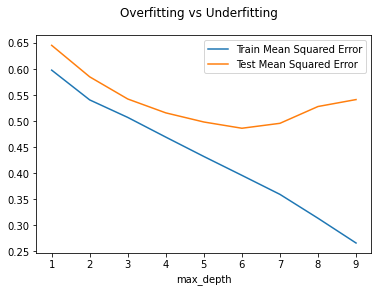

In [49]:
mod2["mse_train"].plot(label="Train Mean Squared Error")
mod2["mse_test"].plot(label="Test Mean Squared Error")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

Al igual que para el modelo anterior, vemos que el error decrece de forma monótona para el subconjunto de entrenamiento pero tiene forma de valle para el de prueba. Esto es indicativo de la presencia de *underfitting* para valores bajos en el número de niveles, ($<6$) mientras que existe *overfitting* para una mayor profundidad del árbol de decisión ($>7$).

- Coeficiente de determinación:

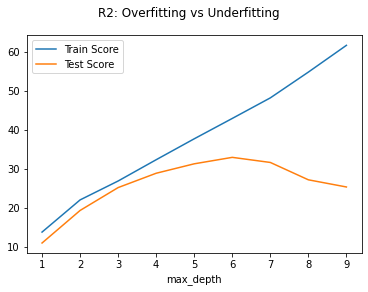

In [50]:
mod2["score_train"].plot(label="Train Score")
mod2["score_test"].plot(label="Test Score")
plt.suptitle("R2: Overfitting vs Underfitting")
plt.legend()
plt.show();

Observamos un máximo en la curva del subconjunto de prueba para $n=6$, por lo que decidimos tomar **6 niveles** como el número óptimo para la profundidad del AD.

In [51]:
pd.DataFrame(mod2.loc[6,:])

,6
score_train,42.867839
score_test,32.897523
mse_train,0.395984
mse_test,0.486299


Si observamos las variables más relevantes a la hora de estimar la media ponderada de votos:

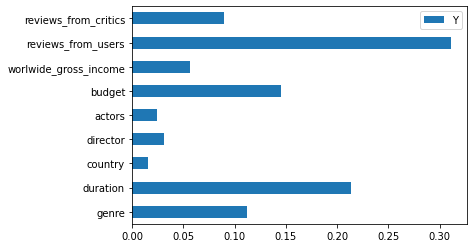

In [52]:
df_imp = pd.DataFrame(tree_model2.feature_importances_.reshape(1,-1), columns=X2.columns, index=["Y"])
df_imp.T.plot.barh()
plt.legend()
plt.show();

La variable explicativa más relevane es *reviews_from_users*, seguida de *duration*, *budget* y *reviews_from_critics*.

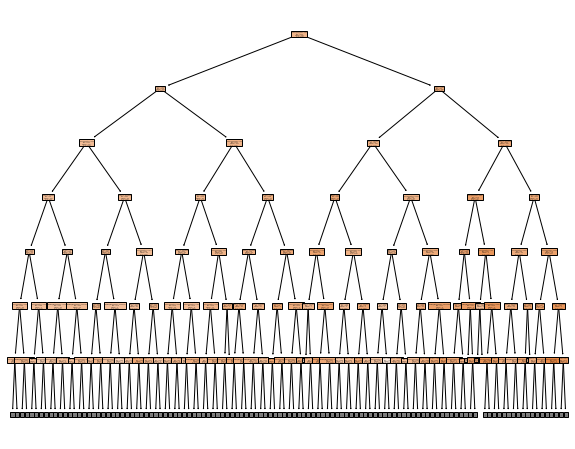

In [53]:
plt.figure(figsize=(10,8))
plot_tree(tree_model2, filled=True, max_depth=6, feature_names=X2.columns, class_names=["Y"])
plt.show()

##Conclusiones

En esta ocasión, la puntuación de una película depende de diversas variables (principalmente *reviews_from_users*, *duration*, *budget* y *reviews_from_critics*). Tiene sentido que no sea tan directo estimar el *rating* como la recaudación, puesto que la opinión pública es un factor mucho más subjetivo. Además, el número de *reviews* es un dato que no aporta demasiada información de por sí si no sabemos si las críticas son favorables o no. Por tanto, tiene sentido que entren en juego otras variables.

Como se puede observar, el árbol de decisión al que llegamos es muy profundo y hace pensar que no sea una muy buena especificación de nuestro modelo, a pesar de ser la mejor a la que se llega mediante la selección de un número de niveles óptimo.

Así, vamos a probar a utilizar el parámetro *min_samples_leaf* y ver si el resultado al que llegamos mejora o empeora:

In [54]:
md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []


for min_samples_leaf in list(range(1,51,1)): #pruebo valores 1-50
  tree_model2v2 = DecisionTreeRegressor(random_state=0, min_samples_leaf=min_samples_leaf)
  tree_model2v2.fit(X2_train, y2_train)

  pred_train2v2 = tree_model2v2.predict(X2_train)
  pred_test2v2 = tree_model2v2.predict(X2_test)

  ## Generación de listas
  md_list.append(min_samples_leaf)
  score_train_list.append(100.0*tree_model2v2.score(X2_train, y2_train))
  score_test_list.append(100.0*tree_model2v2.score(X2_test, y2_test))
  mse_train_list.append(mean_squared_error(y2_train, pred_train2v2))
  mse_test_list.append(mean_squared_error(y2_test, pred_test2v2))

mod2v2 = pd.DataFrame({"min_samples_leaf":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list
                   })

In [55]:
mod2v2.set_index("min_samples_leaf", inplace=True)

- Errores cuadráticos medios

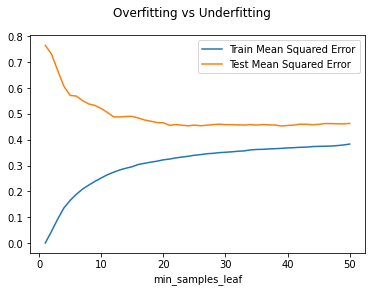

In [56]:
mod2v2["mse_train"].plot(label="Train Mean Squared Error")
mod2v2["mse_test"].plot(label="Test Mean Squared Error")
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show();

Los errores tienden a estancarse al aumentar el número de observaciones en los nodos hoja.

- Coeficiente de determinación:

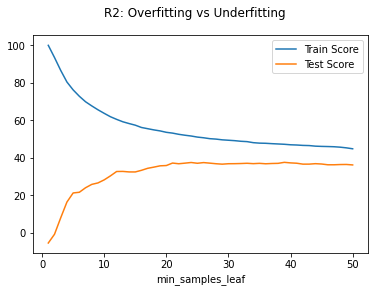

In [57]:
mod2v2["score_train"].plot(label="Train Score")
mod2v2["score_test"].plot(label="Test Score")
plt.suptitle("R2: Overfitting vs Underfitting")
plt.legend()
plt.show();

Se empieza con mucho *overfitting*, lo cual se traduce en un coeficiente de determinación muy alto para $X_{train}$, pero la bondad de ajuste tiende a estancarse al aumentar el número de observaciones en el nodo hoja.

Si seleccionamos un número mínimo de observaciones de 20 en los nodos hoja del árbol:

In [58]:
#Modelizado con mínimo de observaciones en nodo hoja = 20
pd.DataFrame(mod2v2.loc[20,:])

,20
score_train,53.546654
score_test,35.798054
mse_train,0.321969
mse_test,0.465279


Comparando este resultado con el obtenido previamente:

In [59]:
#Modelizado con máximo número de niveles = 5
pd.DataFrame(mod2.loc[mod2['score_test'].idxmax(),:])

,6
score_train,42.867839
score_test,32.897523
mse_train,0.395984
mse_test,0.486299


Concluimos que la nueva especificación ha mejorado el $R^2$ tanto en el  subconjunto de entrenamiento como en el de *testing*, y los errores cuadráticos medios han disminuido para ambos subconjuntos. Por tanto, seleccionamos la nueva modelización para realizar las predicciones del *rating* de películas.

El grafo del modelo final es el siguiente:

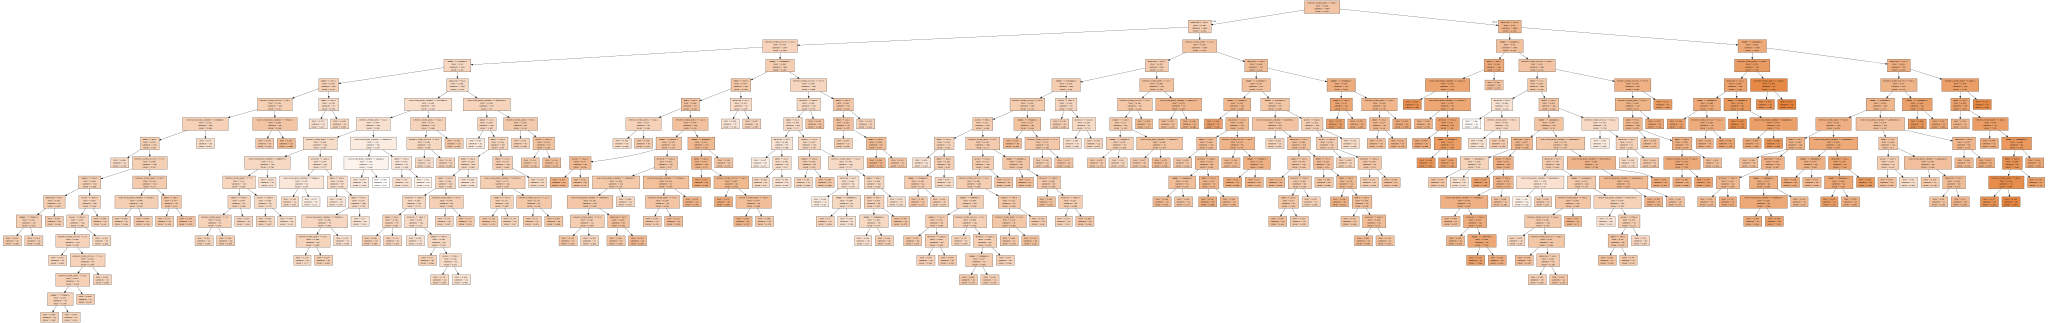

In [60]:
import graphviz
from sklearn.tree import export_graphviz
tree_model2 = DecisionTreeRegressor(random_state=0, min_samples_leaf=20)
tree_model2.fit(X2_train, y2_train)
dot_data = export_graphviz(tree_model2, filled=True, feature_names=X2.columns, class_names=["Y"])
graphviz.Source(dot_data, format="png")

##Predicción

Ahora vamos a realizar una predicción sobre dos películas de nuestra elección para ver cómo funciona el modelo. 

Como ya hemos argumentado, a la hora de seleccionar los valores de las variables explicativas, debemos tener cuidado de que estos estén dentro del rango sobre el que se ha entrenado el modelo. Si seleccionamos duraciones superiores a la de la película más larga del *dataset*, el modelo no será capaz de predecir correctamente.

###Interstellar

La primera película cuya estimación de la media ponderada de los votos en IMDB queremos computar es Interstellar de Christopher Nolan. Si nos vamos al diccionario que creamos al comienzo de la actividad, podemos recuperar los valores codificados para cada una de las variables explicativas:

- Género: Adventure, Drama, Sci-FI

In [61]:
diccionario[diccionario['original_genre'].str.contains("Adventure, Drama, Sci-Fi")].head(1)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
3048,"Adventure, Drama, Sci-Fi",117,Alfonso Cuarón,146,Juan Gabriel Yacuzzi,1969,"USA, UK, Japan",1101


- País: USA, UK, Canada

In [62]:
diccionario[diccionario['original_country'].str.contains("USA, UK, Canada")].head(3)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
407,"Action, Adventure, Drama",5,Richard Donner,3162,Marlon Brando,2505,"USA, UK, Canada, Switzerland",1075
500,"Action, Adventure, Sci-Fi",12,Richard Lester,3178,Gene Hackman,1284,"USA, UK, Canada",1072
928,"Drama, Horror, Sci-Fi",356,David Cronenberg,838,Jeff Goldblum,1696,"USA, UK, Canada",1072


- Director: Christopher Nolan

In [63]:
diccionario[diccionario['original_director'].str.contains("Christopher Nolan")].head(1)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
3056,"Mystery, Thriller",445,Christopher Nolan,657,Guy Pearce,1368,USA,807


- Actriz: Ellen Burstyn

In [64]:
diccionario[diccionario['original_actors'].str.contains("Ellen Burstyn")].head(1)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
288,Horror,424,William Friedkin,3963,Ellen Burstyn,1106,USA,807


- Duración: 169 minutos
- Presupuesto: 165000000\$
- Recaudación: 696742056\$
- Críticas de usuarios: 4100
- Críticas profesionales: 625

Una vez conocemos todos los valores, basta con aplicar el modelo:

In [65]:
#X_pred=X = df[['genre', 'duration', 'country', 'director', 'actors', 'budget', 'worlwide_gross_income', 'reviews_from_users','reviews_from_critics']]
X_pred=[[117,169,1072,657,1106,165000000, 696742056,4100,625]]
round(tree_model2.predict(X_pred)[0],2)

7.92

El *rating* estimado para esta película es de 7,9 mientras que el real es de 8,6,  por lo que el algoritmo se ha aproximado bastante.

###Matrix

La segunda película que vamos a estimar es *The Matrix*. Si recuperamos las variables numéricas:

- Género: Action, Sci-Fi

In [66]:
diccionario[diccionario['original_genre'].str.contains("Action, Sci-Fi")].head(1)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
255,"Action, Sci-Fi",79,Don Taylor,995,Roddy McDowall,3235,USA,807


- País: USA

In [67]:
diccionario[diccionario['original_country'].str.contains("USA")].head(1)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
1,"Drama, Romance, War",377,Rex Ingram,3145,Pomeroy Cannon,3040,USA,807


- Director: Lana Wachowski

In [68]:
diccionario[diccionario['original_director'].str.contains("Lana Wachowski")].head(1)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
2139,"Crime, Romance, Thriller",305,Lana Wachowski,2254,Jennifer Tilly,1725,USA,807


- Actor: Keanu Reeves

In [69]:
diccionario[diccionario['original_actors'].str.contains("Keanu Reeves")].head(1)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
1232,"Adventure, Comedy, Music",98,Stephen Herek,3557,Keanu Reeves,2087,USA,807


- Duración: 136 minutos
- Presupuesto: 63000000$
- Recaudación: 465718588\$
- Críticas de usuarios: 4310
- Críticas profesionales: 342

Una vez conocemos todos los valores, basta con aplicar el modelo:

In [70]:
#X_pred=X = df[['genre', 'duration', 'country', 'director', 'actors', 'budget', 'worlwide_gross_income', 'reviews_from_users','reviews_from_critics']]
X_pred=[[79,136,807,2254,2087,63000000,465718588,4310,342]]
round(tree_model2.predict(X_pred)[0],2)

7.49

La media aproximada que se obtiene es 7,5 mientras que el valor real en IMDB es de 8,7. Por tanto, el algoritmo no está prediciendo correctamente el *rating* ponderado para esta película.

Esto puede deberse a que la película seleccionada es un *outlier* y no se comporta de la misma manera que el resto de puntos. Así, si nos fijamos en la posición de la observación en el *dataset*, al representar las variables más importantes en el modelizado (*reviews_from_users* vs. *budget* y *reviews_from_users* vs. *duration*), vemos que en ambos casos la película se encuentra alejada de la mayor densidad de puntos:

Text(5000, 100, 'MATRIX')

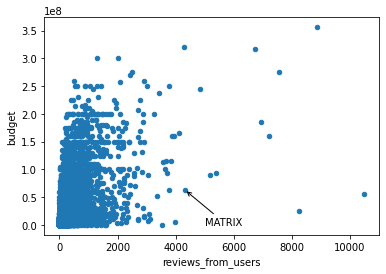

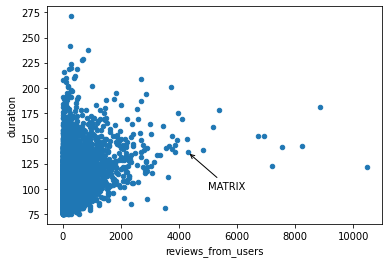

In [71]:
import matplotlib
df.plot(x='reviews_from_users',y='budget',kind='scatter')
matplotlib.pyplot.annotate('MATRIX',(4320,63000000),(5000,20000),arrowprops=dict( arrowstyle="->" ))
df.plot(x='reviews_from_users',y='duration',kind='scatter')
matplotlib.pyplot.annotate('MATRIX',(4320,136),(5000,100),arrowprops=dict( arrowstyle="->" ))

Es razonable esperar que nuestro algoritmo no sea capaz de explicar adecuadamente la variabilidad de esta observación. A continuación vamos a elegir una película que esté contenida en la zona de mayor concentración de observaciones para ver cómo se comporta la predicción.

###The Lion King (2019)

Esta película tiene unos valores más estándar para el conjunto de datos, por lo que esperamos que el modelo se comporte mejor en la predicción. Así:

- Género: Animation, Adventure, Drama

In [72]:
diccionario[diccionario['original_genre'].str.contains("Animation, Adventure, Drama")].head(1)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
532,"Animation, Adventure, Drama",159,Ted Berman,3690,Mickey Rooney,2697,USA,807


- País: USA, UK, South Africa

In [73]:
diccionario[diccionario['original_country'].str.contains("USA, UK, South Africa")].head(2)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
6441,"Action, Adventure, Drama",5,John Stockwell,1947,Halle Berry,1387,"USA, UK, South Africa, Germany, France",1112
8409,"Animation, Adventure, Drama",159,Jon Favreau,1962,Chiwetel Ejiofor,652,"USA, UK, South Africa",1111


- Director: Jon Favreau

In [74]:
diccionario[diccionario['original_director'].str.contains("Jon Favreau")].head(1)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
3126,"Comedy, Crime, Drama",205,Jon Favreau,1962,Jon Favreau,1897,USA,807


- Actor: Chiwetel Ejiofor

In [75]:
diccionario[diccionario['original_actors'].str.contains("Chiwetel Ejiofor")].head(1)

,original_genre,codified_genre,original_director,codified_director,original_actors,codified_actors,original_country,codified_country
3599,"Crime, Drama, Thriller",291,Stephen Frears,3553,Chiwetel Ejiofor,652,UK,618


- Duración: 118 minutos
- Presupuesto: 260000000$
- Recaudación: 1656963790\$
- Críticas de usuarios: 2898
- Críticas profesionales: 370

In [76]:
#X_pred=X = df[['genre', 'duration', 'country', 'director', 'actors', 'budget', 'worlwide_gross_income', 'reviews_from_users','reviews_from_critics']]
X_pred=[[159,118,1112,1962,652,260000000,1656963790,2898,370]]
round(tree_model2.predict(X_pred)[0],2)

6.62

La estimación para la media ponderada de los votos en este caso es 6,6 mientras que el valor real es 6,9. Por consiguiente, la predicción es más acertada que en el caso anterior, como habíamos previsto.